In [2]:
%matplotlib inline

In [3]:
import numpy as np

# data_x = np.load('data_x_scipy.npy')
# data_y = np.load('data_y_scipy.npy')

data_x = np.load('data_x_mel_spectro.npy')
data_y = np.load('data_y_mel_spectro.npy')

data_x = np.transpose(data_x, (0,2,1))

In [4]:
# data_x = data_x[0:300,:,:]
# data_y = data_y[0:300]

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.1, random_state=0)

del data_x, data_y

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.12, random_state=0)

In [24]:
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Flatten,\
    GlobalAveragePooling1D, GlobalMaxPooling1D,GlobalAveragePooling2D, GlobalMaxPooling2D, Add, \
    AveragePooling2D, Reshape, LSTM, TimeDistributed, Activation, ConvLSTM2D, MaxPooling3D, Permute, \
    Concatenate
from keras.models import Sequential, Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping

import datetime
import matplotlib.pyplot as plt
import pickle

In [14]:
earlystop = EarlyStopping(monitor='val_loss', patience=25, mode='min', restore_best_weights=True)

# Dieleman

In [14]:
nb_filters_1=20
nb_filters_2=40
lenght_filters=4
pool_size_1=4
pool_size_2=2
dropout_prob_1=0.5
dropout_prob_2=0.5
# frames=2580
# frequency=128
frames = x_train.shape[1]
frequency = x_train.shape[2]
dense_size=100
nb_classes= y_train.shape[1]


input_placeholder = Input(shape=(frames, frequency))

conv_1 = Conv1D(nb_filters_1, lenght_filters,
                activation='relu', border_mode='same')(
            input_placeholder)
pool_1 = MaxPooling1D(pool_size_1)(conv_1)

conv_2 = Conv1D(nb_filters_1, lenght_filters,
                border_mode='same', activation='relu')(pool_1)
pool_2 = MaxPooling1D(pool_size_1)(conv_2)

conv_3 = Conv1D(nb_filters_2, lenght_filters,
                border_mode='same', activation='relu')(pool_2)
pool_3 = MaxPooling1D(pool_size_2)(conv_3)

global_mean = GlobalAveragePooling1D()(pool_3)
global_max = GlobalMaxPooling1D()(pool_3)

# concat = merge([global_mean, global_max], mode='concat',
#                concat_axis=-1)
concat = Add()([global_mean, global_max])

hidden = Dense(dense_size, activation='relu')(concat)
drop_1 = Dropout(dropout_prob_1)(hidden)
hidden_2 = Dense(dense_size, activation='relu')(drop_1)
drop_2 = Dropout(dropout_prob_1)(hidden_2)

output = Dense(nb_classes, activation='softmax')(drop_2)

model = Model(input=input_placeholder, output=output)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

now = str(datetime.datetime.now()).replace(':','_').replace('-','_')
tensorboard = TensorBoard(log_dir="tensorboard_log/Dieleman{}".format(now))

filepath="models/dieleman-best1.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

nb_epoch = 150
batch_size = 64
dieleman_history = model.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch,
                       validation_data=(x_val,y_val), callbacks=[tensorboard, checkpoint, earlystop])
pickle.dump( dieleman_history, open( "dieleman_history2.p", "wb" ) )

model.load_weights(filepath)
model.save('models/dieleman1.h5') 

C:\Program Files\Python36\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(20, 4, activation="relu", padding="same")`
C:\Program Files\Python36\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(20, 4, activation="relu", padding="same")`
C:\Program Files\Python36\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(40, 4, activation="relu", padding="same")`
C:\Program Files\Python36\lib\site-packages\ipykernel_launcher.py:45: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 1200, 128)    0                                            
__________________________________________________________________________________________________
conv1d_9 (Conv1D)               (None, 1200, 20)     10260       input_3[0][0]                    
__________________________________________________________________________________________________
max_pooling1d_8 (MaxPooling1D)  (None, 300, 20)      0           conv1d_9[0][0]                   
__________________________________________________________________________________________________
conv1d_10 (Conv1D)              (None, 300, 20)      1620        max_pooling1d_8[0][0]            
__________________________________________________________________________________________________
max_poolin

6329/6329 [==============================] - 11s 2ms/step - loss: 1.5056 - acc: 0.4604 - val_loss: 1.4993 - val_acc: 0.4525

Epoch 00022: val_loss improved from 1.51850 to 1.49934, saving model to models/dieleman-best1.hdf5
Epoch 23/150
6329/6329 [==============================] - 11s 2ms/step - loss: 1.4952 - acc: 0.4702 - val_loss: 1.5168 - val_acc: 0.4479

Epoch 00023: val_loss did not improve from 1.49934
Epoch 24/150
6329/6329 [==============================] - 11s 2ms/step - loss: 1.4927 - acc: 0.4669 - val_loss: 1.5032 - val_acc: 0.4514

Epoch 00024: val_loss did not improve from 1.49934
Epoch 25/150
6329/6329 [==============================] - 11s 2ms/step - loss: 1.4874 - acc: 0.4685 - val_loss: 1.5100 - val_acc: 0.4514

Epoch 00025: val_loss did not improve from 1.49934
Epoch 26/150
6329/6329 [==============================] - 11s 2ms/step - loss: 1.4722 - acc: 0.4737 - val_loss: 1.5333 - val_acc: 0.4306

Epoch 00026: val_loss did not improve from 1.49934
Epoch 27/150
6329/63

# Dieleman with actual hyperparameters from blog

In [35]:
nb_filters_1=256
nb_filters_2=512
lenght_filters=4
pool_size_1=4
pool_size_2=2
dropout_prob_1=0.5
dropout_prob_2=0.5
# frames=2580
# frequency=128
frames = x_train.shape[1]
frequency = x_train.shape[2]
dense_size=2048
nb_classes= y_train.shape[1]


input_placeholder = Input(shape=(frames, frequency))

conv_1 = Conv1D(nb_filters_1, lenght_filters,
                activation='relu', border_mode='same')(
            input_placeholder)
pool_1 = MaxPooling1D(pool_size_1)(conv_1)

conv_2 = Conv1D(nb_filters_1, lenght_filters,
                border_mode='same', activation='relu')(pool_1)
pool_2 = MaxPooling1D(pool_size_1)(conv_2)

conv_3 = Conv1D(nb_filters_2, lenght_filters,
                border_mode='same', activation='relu')(pool_2)
pool_3 = MaxPooling1D(pool_size_2)(conv_3)

global_mean = GlobalAveragePooling1D()(pool_3)
global_max = GlobalMaxPooling1D()(pool_3)

# concat = merge([global_mean, global_max], mode='concat',
#                concat_axis=-1)
concat = Add()([global_mean, global_max])

hidden = Dense(dense_size, activation='relu')(concat)
drop_1 = Dropout(dropout_prob_1)(hidden)
hidden_2 = Dense(dense_size, activation='relu')(drop_1)
drop_2 = Dropout(dropout_prob_1)(hidden_2)

output = Dense(nb_classes, activation='softmax')(drop_2)

model = Model(input=input_placeholder, output=output)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

now = str(datetime.datetime.now()).replace(':','_').replace('-','_')
tensorboard = TensorBoard(log_dir="tensorboard_log/DielemanPaper{}".format(now))

filepath="models/dieleman-Paper1.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

nb_epoch = 150
batch_size = 64
dieleman_history = model.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch,
                       validation_data=(x_val,y_val), callbacks=[tensorboard, checkpoint, earlystop])
pickle.dump( dieleman_history, open( "dieleman_Paper_history2.p", "wb" ) )

model.load_weights(filepath)
model.save('models/dieleman_Paper1.h5') 

C:\Program Files\Python36\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(256, 4, activation="relu", padding="same")`
C:\Program Files\Python36\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(256, 4, activation="relu", padding="same")`
C:\Program Files\Python36\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(512, 4, activation="relu", padding="same")`
C:\Program Files\Python36\lib\site-packages\ipykernel_launcher.py:45: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 1200, 128)    0                                            
__________________________________________________________________________________________________
conv1d_4 (Conv1D)               (None, 1200, 256)    131328      input_8[0][0]                    
__________________________________________________________________________________________________
max_pooling1d_4 (MaxPooling1D)  (None, 300, 256)     0           conv1d_4[0][0]                   
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, 300, 256)     262400      max_pooling1d_4[0][0]            
__________________________________________________________________________________________________
max_poolin

6329/6329 [==============================] - 20s 3ms/step - loss: 0.9377 - acc: 0.6622 - val_loss: 1.7438 - val_acc: 0.4850

Epoch 00023: val_loss did not improve from 1.50950
Epoch 24/150
6329/6329 [==============================] - 20s 3ms/step - loss: 0.8716 - acc: 0.6891 - val_loss: 2.0055 - val_acc: 0.4502

Epoch 00024: val_loss did not improve from 1.50950
Epoch 25/150
6329/6329 [==============================] - 21s 3ms/step - loss: 0.8123 - acc: 0.7118 - val_loss: 1.8019 - val_acc: 0.4873

Epoch 00025: val_loss did not improve from 1.50950
Epoch 26/150
6329/6329 [==============================] - 20s 3ms/step - loss: 0.7411 - acc: 0.7374 - val_loss: 2.1728 - val_acc: 0.4363

Epoch 00026: val_loss did not improve from 1.50950
Epoch 27/150
6329/6329 [==============================] - 21s 3ms/step - loss: 0.8053 - acc: 0.7260 - val_loss: 2.1960 - val_acc: 0.4444

Epoch 00027: val_loss did not improve from 1.50950
Epoch 28/150
6329/6329 [==============================] - 20s 3ms/st

# Ghosal No Lstm

In [18]:
# CNN LSTM Paper recreate
hidden_size = 20

model = Sequential()

model.add(Conv1D(filters=128, kernel_size=3, strides=1,
                activation='relu', border_mode='same',
                input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=64, kernel_size=3, strides=1,
                activation='relu'))


# model.add(Dropout(0.25))

# model.add(LSTM(hidden_size, return_sequences=False, activation='relu'))
model.add(GlobalMaxPooling1D())


# model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

now = str(datetime.datetime.now()).replace(':','_').replace('-','_')
tensorboard = TensorBoard(log_dir="tensorboard_log/GhosalNoLSTM{}".format(now))

filepath="models/GhosalNoLSTM1.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

ghosal_no_lstm_history = model.fit(x_train, y_train, batch_size=64, epochs=120,
              validation_data=(x_val,y_val), callbacks=[tensorboard, checkpoint, earlystop])
pickle.dump( ghosal_no_lstm_history, open( "ghosal_no_lstm_history2.p", "wb" ) )

model.load_weights(filepath)
model.save('models/ghosal_no_lstm1.h5') 

C:\Program Files\Python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(filters=128, kernel_size=3, strides=1, activation="relu", input_shape=(1200, 128..., padding="same")`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 1200, 128)         49280     
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 600, 128)          0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 598, 64)           24640     
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 64)                0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 520       
Total params: 74,440
Trainable params: 74,440
Non-trainable params: 0
_________________________________________________________________
Train 

6329/6329 [==============================] - 12s 2ms/step - loss: 1.3305 - acc: 0.5249 - val_loss: 1.4270 - val_acc: 0.4861

Epoch 00034: val_loss improved from 1.44323 to 1.42698, saving model to models/GhosalNoLSTM1.hdf5
Epoch 35/120
6329/6329 [==============================] - 12s 2ms/step - loss: 1.3222 - acc: 0.5329 - val_loss: 1.4853 - val_acc: 0.4757

Epoch 00035: val_loss did not improve from 1.42698
Epoch 36/120
6329/6329 [==============================] - 12s 2ms/step - loss: 1.3102 - acc: 0.5359 - val_loss: 1.4751 - val_acc: 0.4815

Epoch 00036: val_loss did not improve from 1.42698
Epoch 37/120
6329/6329 [==============================] - 12s 2ms/step - loss: 1.3065 - acc: 0.5380 - val_loss: 1.4811 - val_acc: 0.4919

Epoch 00037: val_loss did not improve from 1.42698
Epoch 38/120
6329/6329 [==============================] - 12s 2ms/step - loss: 1.2992 - acc: 0.5415 - val_loss: 1.4766 - val_acc: 0.4815

Epoch 00038: val_loss did not improve from 1.42698
Epoch 39/120
6329/632

# Ghosal LSTM (Just last hidden)

In [25]:
hidden_size = 64

model = Sequential()

model.add(Conv1D(filters=128, kernel_size=3, strides=1,
                activation='relu', border_mode='same',
                input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=64, kernel_size=3, strides=1,
                activation='relu'))


model.add(Dropout(0.25))

model.add(LSTM(hidden_size, return_sequences=False, activation='sigmoid'))
# model.add(GlobalMaxPooling1D())


# model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

now = str(datetime.datetime.now()).replace(':','_').replace('-','_')
tensorboard = TensorBoard(log_dir="tensorboard_log/GhosalLSTM{}".format(now))

filepath="models/GhosalLSTM1.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

ghosal_lstm_history = model.fit(x_train, y_train, batch_size=64, epochs=100, 
          validation_data=(x_val,y_val), callbacks=[tensorboard, checkpoint, earlystop])
pickle.dump( ghosal_lstm_history, open( "ghosal_lstm_history2.p", "wb" ) )

model.load_weights(filepath)
model.save('models/ghosal_lstm1.h5') 

C:\Program Files\Python36\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(filters=128, kernel_size=3, strides=1, activation="relu", input_shape=(1200, 128..., padding="same")`
  import sys


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_14 (Conv1D)           (None, 1200, 128)         49280     
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 600, 128)          0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 598, 64)           24640     
_________________________________________________________________
dropout_9 (Dropout)          (None, 598, 64)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 520       
Total para

6329/6329 [==============================] - 108s 17ms/step - loss: 1.4530 - acc: 0.4792 - val_loss: 1.4854 - val_acc: 0.4630

Epoch 00032: val_loss improved from 1.50656 to 1.48541, saving model to models/GhosalLSTM1.hdf5
Epoch 33/100
6329/6329 [==============================] - 109s 17ms/step - loss: 1.4435 - acc: 0.4808 - val_loss: 1.5335 - val_acc: 0.4630

Epoch 00033: val_loss did not improve from 1.48541
Epoch 34/100
6329/6329 [==============================] - 109s 17ms/step - loss: 1.4168 - acc: 0.4941 - val_loss: 1.4901 - val_acc: 0.4815

Epoch 00034: val_loss did not improve from 1.48541
Epoch 35/100
6329/6329 [==============================] - 108s 17ms/step - loss: 1.4313 - acc: 0.4919 - val_loss: 1.5125 - val_acc: 0.4444

Epoch 00035: val_loss did not improve from 1.48541
Epoch 36/100
6329/6329 [==============================] - 109s 17ms/step - loss: 1.4130 - acc: 0.4911 - val_loss: 1.4880 - val_acc: 0.4583

Epoch 00036: val_loss did not improve from 1.48541
Epoch 37/100


6329/6329 [==============================] - 110s 17ms/step - loss: 1.1078 - acc: 0.6176 - val_loss: 1.5458 - val_acc: 0.4942

Epoch 00074: val_loss did not improve from 1.44831
Epoch 75/100
6329/6329 [==============================] - 109s 17ms/step - loss: 1.1148 - acc: 0.6085 - val_loss: 1.5097 - val_acc: 0.4942

Epoch 00075: val_loss did not improve from 1.44831
Epoch 76/100
6329/6329 [==============================] - 109s 17ms/step - loss: 1.0860 - acc: 0.6211 - val_loss: 1.4956 - val_acc: 0.5046

Epoch 00076: val_loss did not improve from 1.44831
Epoch 77/100
6329/6329 [==============================] - 108s 17ms/step - loss: 1.1147 - acc: 0.6137 - val_loss: 1.5180 - val_acc: 0.4884

Epoch 00077: val_loss did not improve from 1.44831
Epoch 78/100
6329/6329 [==============================] - 109s 17ms/step - loss: 1.0967 - acc: 0.6142 - val_loss: 1.5328 - val_acc: 0.4861

Epoch 00078: val_loss did not improve from 1.44831
Epoch 79/100
6329/6329 [==============================] - 

# Ghosal LSTM (All hiddens)

In [26]:
hidden_size = 64

model = Sequential()

model.add(Conv1D(filters=128, kernel_size=3, strides=1,
                activation='relu', border_mode='same',
                input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=64, kernel_size=3, strides=1,
                activation='relu'))


model.add(Dropout(0.25))

model.add(LSTM(hidden_size, return_sequences=True, activation='tanh'))
# model.add(GlobalMaxPooling1D())


model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

now = str(datetime.datetime.now()).replace(':','_').replace('-','_')
tensorboard = TensorBoard(log_dir="tensorboard_log/GhosalLSTMhidd{}".format(now))

filepath="models/GhosalLSTMhidd1.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

ghosal_lstm_all_hiddens_history = model.fit(x_train, y_train, batch_size=64, epochs=100, 
          validation_data=(x_val,y_val), callbacks=[tensorboard, checkpoint, earlystop])
pickle.dump( ghosal_lstm_all_hiddens_history, open( "ghosal_lstm_all_hiddens_history2.p", "wb" ) )

model.load_weights(filepath)
model.save('models/ghosal_lstm_all_hiddens1.h5') 

C:\Program Files\Python36\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(filters=128, kernel_size=3, strides=1, activation="relu", input_shape=(1200, 128..., padding="same")`
  import sys


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 1200, 128)         49280     
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 600, 128)          0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 598, 64)           24640     
_________________________________________________________________
dropout_11 (Dropout)         (None, 598, 64)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 598, 64)           33024     
_________________________________________________________________
flatten_1 (Flatten)          (None, 38272)             0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 38272)             0         
__________

# Ghosal Modified with 2D Convolutions

In [27]:
# hidden_size = 64

# model = Sequential()

# model.add(Reshape((x_train.shape[1], x_train.shape[2], 1) , 
#                  input_shape=(x_train.shape[1], x_train.shape[2])))

# model.add(Conv2D(filters=128, kernel_size=(1,16), strides=(1,16),
#                 activation='relu', border_mode='same'))
# model.add(MaxPooling2D(pool_size=(2,1)))


# model.add(Conv2D(filters=64, kernel_size=(1,8), strides=(1,8),
#                 activation='relu', border_mode='same'))
# model.add(Dropout(0.25))

# model.add(GlobalMaxPooling2D())


# model.add(Dropout(0.25))
# model.add(Dense(y_train.shape[1], activation='softmax'))

# model.compile(loss='categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

# model.summary()

# now = str(datetime.datetime.now()).replace(':','_').replace('-','_')
# tensorboard = TensorBoard(log_dir="tensorboard_log/GhosalMod{}".format(now))

# filepath="models/GhosalMod1.hdf5"
# checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# ghosal_mod_history = model.fit(x_train, y_train, batch_size=64, epochs=200, 
#           validation_data=(x_val,y_val), callbacks=[tensorboard, checkpoint, earlystop])
# pickle.dump( ghosal_mod_history, open( "ghosal_mod_history2.p", "wb" ) )

In [28]:
hidden_size = 64

model = Sequential()

model.add(Reshape((x_train.shape[1], x_train.shape[2], 1) , 
                 input_shape=(x_train.shape[1], x_train.shape[2])))

model.add(Conv2D(filters=128, kernel_size=(3,16), strides=(1,16),
                activation='relu', border_mode='same'))
model.add(MaxPooling2D(pool_size=(2,1)))

model.add(Dropout(0.25))
# model.add(Permute((1,3,2)))
model.add(Conv2D(filters=64, kernel_size=(3,8), strides=(1,8),
                activation='relu', border_mode='same'))


model.add(GlobalMaxPooling2D())


model.add(Dropout(0.25))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

now = str(datetime.datetime.now()).replace(':','_').replace('-','_')
tensorboard = TensorBoard(log_dir="tensorboard_log/GhosalMod3{}".format(now))

filepath="models/GhosalMod1.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

ghosal_mod_history2 = model.fit(x_train, y_train, batch_size=64, epochs=200, 
          validation_data=(x_val,y_val), callbacks=[tensorboard, checkpoint, earlystop])
pickle.dump( ghosal_mod_history2, open( "ghosal_mod_history3.p", "wb" ) )

model.load_weights(filepath)
model.save('models/ghosal_mod1.h5') 

C:\Program Files\Python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=128, kernel_size=(3, 16), strides=(1, 16), activation="relu", padding="same")`
  if __name__ == '__main__':
C:\Program Files\Python36\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=64, kernel_size=(3, 8), strides=(1, 8), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 1200, 128, 1)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1200, 8, 128)      6272      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 600, 8, 128)       0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 600, 8, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 600, 1, 64)        196672    
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 64)                0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)                0         
__________

6329/6329 [==============================] - 27s 4ms/step - loss: 1.1789 - acc: 0.5881 - val_loss: 1.3931 - val_acc: 0.5197

Epoch 00033: val_loss improved from 1.39452 to 1.39305, saving model to models/GhosalMod1.hdf5
Epoch 34/200
6329/6329 [==============================] - 27s 4ms/step - loss: 1.1665 - acc: 0.5887 - val_loss: 1.4641 - val_acc: 0.4826

Epoch 00034: val_loss did not improve from 1.39305
Epoch 35/200
6329/6329 [==============================] - 27s 4ms/step - loss: 1.1509 - acc: 0.5980 - val_loss: 1.3957 - val_acc: 0.5093

Epoch 00035: val_loss did not improve from 1.39305
Epoch 36/200
6329/6329 [==============================] - 28s 4ms/step - loss: 1.1375 - acc: 0.5900 - val_loss: 1.3868 - val_acc: 0.5301

Epoch 00036: val_loss improved from 1.39305 to 1.38680, saving model to models/GhosalMod1.hdf5
Epoch 37/200
6329/6329 [==============================] - 28s 4ms/step - loss: 1.1244 - acc: 0.6055 - val_loss: 1.4125 - val_acc: 0.5012

Epoch 00037: val_loss did not i

# Mod 2D plus LSTM

In [16]:
hidden_size = 64

model = Sequential()

model.add(Reshape((x_train.shape[1], x_train.shape[2], 1) , 
                 input_shape=(x_train.shape[1], x_train.shape[2])))

model.add(Conv2D(filters=128, kernel_size=(3,16), strides=(1,16),
                activation='relu', border_mode='same'))
model.add(MaxPooling2D(pool_size=(2,1)))

model.add(Dropout(0.25))
# model.add(Permute((1,3,2)))
model.add(Conv2D(filters=64, kernel_size=(3,8), strides=(1,8),
                activation='relu', border_mode='same'))

model.add(Reshape((600,64)))
model.add(LSTM(hidden_size, return_sequences=True, activation='sigmoid'))
model.add(GlobalMaxPooling1D())

model.add(Dropout(0.25))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

now = str(datetime.datetime.now()).replace(':','_').replace('-','_')
tensorboard = TensorBoard(log_dir="tensorboard_log/GhosalModLSTM1{}".format(now))

filepath="models/GhosalModLSTM1.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

ghosal_mod_LSTM_history1 = model.fit(x_train, y_train, batch_size=64, epochs=200, 
          validation_data=(x_val,y_val), callbacks=[tensorboard, checkpoint, earlystop])
pickle.dump( ghosal_mod_LSTM_history1, open( "ghosal_mod_LSTM_history1.p", "wb" ) )

model.load_weights(filepath)
model.save('models/ghosal_mod_LSTM1.h5') 

C:\Program Files\Python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=128, kernel_size=(3, 16), strides=(1, 16), activation="relu", padding="same")`
  if __name__ == '__main__':
C:\Program Files\Python36\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=64, kernel_size=(3, 8), strides=(1, 8), activation="relu", padding="same")`
  from ipykernel import kernelapp as app


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_8 (Reshape)          (None, 1200, 128, 1)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 1200, 8, 128)      6272      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 600, 8, 128)       0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 600, 8, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 600, 1, 64)        196672    
_________________________________________________________________
reshape_9 (Reshape)          (None, 600, 64)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 600, 64)           33024     
__________

6329/6329 [==============================] - 126s 20ms/step - loss: 1.3439 - acc: 0.5211 - val_loss: 1.4123 - val_acc: 0.4896

Epoch 00028: val_loss improved from 1.41963 to 1.41225, saving model to models/GhosalModLSTM1.hdf5
Epoch 29/200
6329/6329 [==============================] - 126s 20ms/step - loss: 1.3300 - acc: 0.5331 - val_loss: 1.4196 - val_acc: 0.4931

Epoch 00029: val_loss did not improve from 1.41225
Epoch 30/200
6329/6329 [==============================] - 126s 20ms/step - loss: 1.3171 - acc: 0.5315 - val_loss: 1.4084 - val_acc: 0.4803

Epoch 00030: val_loss improved from 1.41225 to 1.40842, saving model to models/GhosalModLSTM1.hdf5
Epoch 31/200
6329/6329 [==============================] - 127s 20ms/step - loss: 1.3135 - acc: 0.5416 - val_loss: 1.4133 - val_acc: 0.5058

Epoch 00031: val_loss did not improve from 1.40842
Epoch 32/200
6329/6329 [==============================] - 125s 20ms/step - loss: 1.2963 - acc: 0.5358 - val_loss: 1.3874 - val_acc: 0.5069

Epoch 00032: 

6329/6329 [==============================] - 127s 20ms/step - loss: 0.9845 - acc: 0.6584 - val_loss: 1.4131 - val_acc: 0.5324

Epoch 00069: val_loss did not improve from 1.36371
Epoch 70/200
6329/6329 [==============================] - 127s 20ms/step - loss: 0.9721 - acc: 0.6649 - val_loss: 1.4377 - val_acc: 0.5428

Epoch 00070: val_loss did not improve from 1.36371
Epoch 71/200
6329/6329 [==============================] - 127s 20ms/step - loss: 0.9599 - acc: 0.6676 - val_loss: 1.4234 - val_acc: 0.5463

Epoch 00071: val_loss did not improve from 1.36371


In [27]:
hidden_size = 64

inputs = Input(shape=(x_train.shape[1], x_train.shape[2]))

reshape_1 = Reshape((x_train.shape[1], x_train.shape[2], 1) )(inputs)

conv_1 = Conv2D(filters=128, kernel_size=(3,16), strides=(1,16),
                activation='relu', border_mode='same')(reshape_1)
max_pool_1 = MaxPooling2D(pool_size=(2,1))(conv_1)

dropout_1 = Dropout(0.25)(max_pool_1)

conv_2 = Conv2D(filters=64, kernel_size=(3,8), strides=(1,8),
                activation='relu', border_mode='same')(dropout_1)

reshape_2 = Reshape((600,64))(conv_2)

conv_1d_1 = Conv1D(filters=64, kerne_size=3, activation='relu')(reshape_2)

lstm_1 = LSTM(hidden_size, return_sequences=True, activation='sigmoid')(reshape_2)
global_mean = GlobalAveragePooling1D()(lstm_1)
global_max = GlobalMaxPooling1D()(lstm_1)

# concat = merge([global_mean, global_max], mode='concat',
#                concat_axis=-1)
concat = Concatenate()([global_mean, global_max])

dropout_2 = Dropout(0.25)(concat)
predictions = Dense(y_train.shape[1], activation='softmax')(dropout_2)

model = Model(inputs=inputs, outputs=predictions)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

now = str(datetime.datetime.now()).replace(':','_').replace('-','_')
tensorboard = TensorBoard(log_dir="tensorboard_log/GhosalModLSTMBig1{}".format(now))

filepath="models/GhosalModLSTMBig1.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

ghosal_mod_LSTM_history1 = model.fit(x_train, y_train, batch_size=64, epochs=200, 
          validation_data=(x_val,y_val), callbacks=[tensorboard, checkpoint, earlystop])
pickle.dump( ghosal_mod_LSTM_history1, open( "ghosal_mod_LSTM_historyBig1.p", "wb" ) )

model.load_weights(filepath)
model.save('models/ghosal_mod_LSTM_Big1.h5') 

C:\Program Files\Python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=128, kernel_size=(3, 16), strides=(1, 16), activation="relu", padding="same")`
  
C:\Program Files\Python36\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=64, kernel_size=(3, 8), strides=(1, 8), activation="relu", padding="same")`
  


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 1200, 128)    0                                            
__________________________________________________________________________________________________
reshape_20 (Reshape)            (None, 1200, 128, 1) 0           input_6[0][0]                    
__________________________________________________________________________________________________
conv2d_23 (Conv2D)              (None, 1200, 8, 128) 6272        reshape_20[0][0]                 
__________________________________________________________________________________________________
max_pooling2d_12 (MaxPooling2D) (None, 600, 8, 128)  0           conv2d_23[0][0]                  
__________________________________________________________________________________________________
dropout_19

6329/6329 [==============================] - 189s 30ms/step - loss: 1.4477 - acc: 0.4840 - val_loss: 1.4566 - val_acc: 0.4734

Epoch 00021: val_loss improved from 1.49391 to 1.45663, saving model to models/GhosalModLSTMBig1.hdf5
Epoch 22/200
6329/6329 [==============================] - 189s 30ms/step - loss: 1.4257 - acc: 0.4930 - val_loss: 1.4662 - val_acc: 0.4641

Epoch 00022: val_loss did not improve from 1.45663
Epoch 23/200
6329/6329 [==============================] - 190s 30ms/step - loss: 1.4086 - acc: 0.4958 - val_loss: 1.4750 - val_acc: 0.4676

Epoch 00023: val_loss did not improve from 1.45663
Epoch 24/200
6329/6329 [==============================] - 189s 30ms/step - loss: 1.4017 - acc: 0.4996 - val_loss: 1.4775 - val_acc: 0.4502

Epoch 00024: val_loss did not improve from 1.45663
Epoch 25/200
6329/6329 [==============================] - 190s 30ms/step - loss: 1.3959 - acc: 0.4974 - val_loss: 1.4512 - val_acc: 0.4838

Epoch 00025: val_loss improved from 1.45663 to 1.45119, sa

6329/6329 [==============================] - 190s 30ms/step - loss: 0.9735 - acc: 0.6603 - val_loss: 1.4443 - val_acc: 0.5116

Epoch 00061: val_loss did not improve from 1.39480
Epoch 62/200
6329/6329 [==============================] - 191s 30ms/step - loss: 0.9583 - acc: 0.6612 - val_loss: 1.4491 - val_acc: 0.5266

Epoch 00062: val_loss did not improve from 1.39480
Epoch 63/200
6329/6329 [==============================] - 191s 30ms/step - loss: 0.9515 - acc: 0.6668 - val_loss: 1.4791 - val_acc: 0.5012

Epoch 00063: val_loss did not improve from 1.39480
Epoch 64/200
6329/6329 [==============================] - 190s 30ms/step - loss: 0.9426 - acc: 0.6693 - val_loss: 1.4677 - val_acc: 0.5139

Epoch 00064: val_loss did not improve from 1.39480
Epoch 65/200
6329/6329 [==============================] - 191s 30ms/step - loss: 0.9234 - acc: 0.6755 - val_loss: 1.4674 - val_acc: 0.5069

Epoch 00065: val_loss did not improve from 1.39480
Epoch 66/200
6329/6329 [==============================] - 

# Visualize

In [19]:
def plotHistory(history):
    plt.figure()
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()

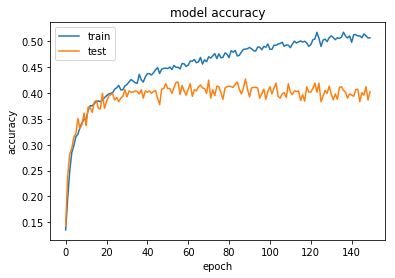

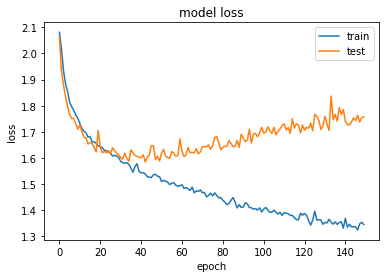

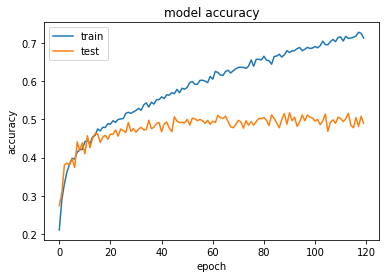

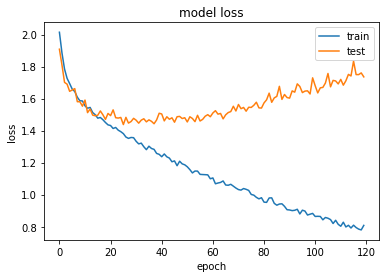

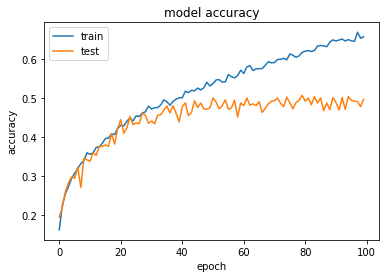

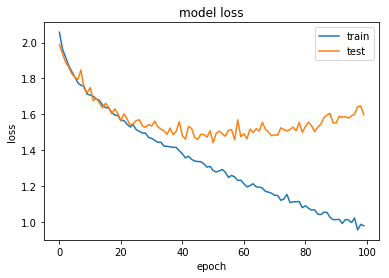

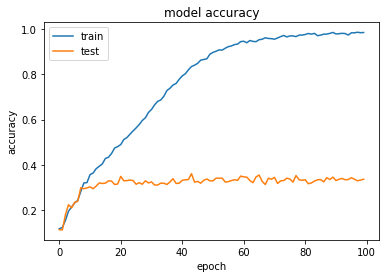

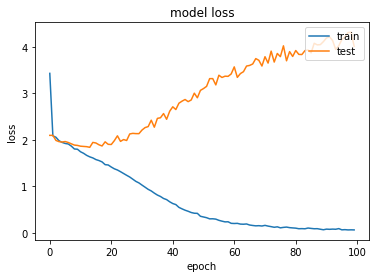

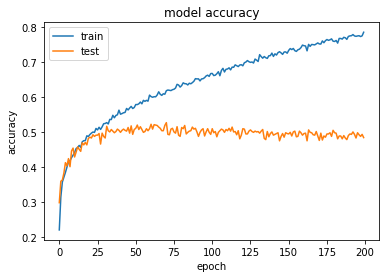

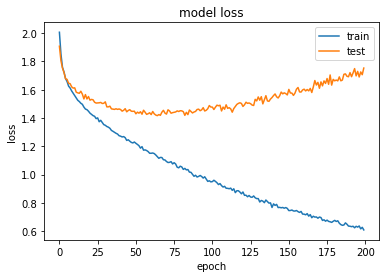

In [20]:
dieleman_history = pickle.load( open( "dieleman_history.p", "rb" ) )
history = dieleman_history
plotHistory(history)

ghosal_no_lstm_history = pickle.load( open( "ghosal_no_lstm_history.p", "rb" ) )
history = ghosal_no_lstm_history
plotHistory(history)

ghosal_lstm_history = pickle.load( open( "ghosal_lstm_history.p", "rb" ) )
history = ghosal_lstm_history
plotHistory(history)

ghosal_lstm_all_hiddens_history = pickle.load( open( "ghosal_lstm_all_hiddens_history.p", "rb" ) )
history = ghosal_lstm_all_hiddens_history
plotHistory(history)

ghosal_mod_history = pickle.load( open( "ghosal_mod_history.p", "rb" ) )
history = ghosal_mod_history
plotHistory(history)

# Test Evaluations

In [18]:
def eval(model):
    y_pred = model.predict(x_test)
    score, acc = model.evaluate(x_test, y_test,
                                batch_size=30)
    print('Test score:', score)
    print('Test accuracy:', acc)

In [29]:
model = load_model('models/dieleman1.h5')
eval(model)
model = load_model('models/ghosal_no_lstm1.h5')
eval(model)
model = load_model('models/ghosal_lstm1.h5')
eval(model)
model = load_model('models/ghosal_lstm_all_hiddens1.h5')
eval(model)
model = load_model('models/ghosal_mod1.h5')
eval(model)

800/800 [==============================] - 2s 2ms/step
Test score: 1.5170807898044587
Test accuracy: 0.4562500067055225
800/800 [==============================] - 2s 2ms/step
Test score: 1.4602705255150794
Test accuracy: 0.48875000737607477
800/800 [==============================] - 11s 13ms/step
Test score: 1.462088218331337
Test accuracy: 0.4950000051409006
800/800 [==============================] - 11s 13ms/step
Test score: 1.7570510864257813
Test accuracy: 0.3300000073388219
800/800 [==============================] - 2s 3ms/step
Test score: 1.4033874794840813
Test accuracy: 0.5337500087916851


In [28]:
model = load_model('models/ghosal_mod_LSTM1.h5')
eval(model)
model = load_model('models/ghosal_mod_LSTM_Big1.h5')
eval(model)

800/800 [==============================] - 12s 15ms/step
Test score: 1.363742245733738
Test accuracy: 0.54750000461936
800/800 [==============================] - 15s 19ms/step
Test score: 1.397882542014122
Test accuracy: 0.5062500063329936


# More visualization

In [68]:
dieleman_history = pickle.load( open( "dieleman_history2.p", "rb" ) )

ghosal_no_lstm_history = pickle.load( open( "ghosal_no_lstm_history2.p", "rb" ) )

ghosal_lstm_history = pickle.load( open( "ghosal_lstm_history2.p", "rb" ) )

# ghosal_lstm_all_hiddens_history = pickle.load( open( "ghosal_lstm_all_hiddens_history.p", "rb" ) )

# ghosal_mod_history = pickle.load( open( "ghosal_mod_history3.p", "rb" ) )
ghosal_mod_history = pickle.load( open( "ghosal_mod_LSTM_history1.p", "rb" ) )



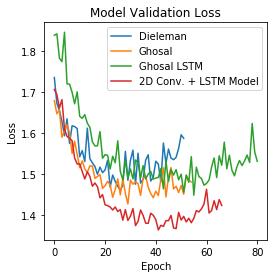

In [85]:
plt.figure(figsize=(4,4))
# summarize history for loss
max_epoch = 125
min_epoch = 4
plt.plot(dieleman_history.history['val_loss'][min_epoch:max_epoch], label='Dieleman')
plt.plot(ghosal_no_lstm_history.history['val_loss'][min_epoch:max_epoch], label='Ghosal')
plt.plot(ghosal_lstm_history.history['val_loss'][min_epoch:max_epoch], label='Ghosal LSTM')
plt.plot(ghosal_mod_history.history['val_loss'][min_epoch:max_epoch], label='2D Conv. + LSTM Model')

plt.title('Model Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.savefig('modelValidationLoss.png', bbox_inches='tight')
plt.show()

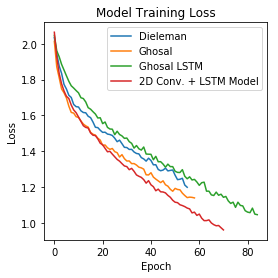

In [86]:
plt.figure(figsize=(4,4))
# summarize history for loss
max_epoch = 125
min_epoch = 0
plt.plot(dieleman_history.history['loss'][min_epoch:max_epoch], label='Dieleman')
plt.plot(ghosal_no_lstm_history.history['loss'][min_epoch:max_epoch], label='Ghosal')
plt.plot(ghosal_lstm_history.history['loss'][min_epoch:max_epoch], label='Ghosal LSTM')
plt.plot(ghosal_mod_history.history['loss'][min_epoch:max_epoch], label='2D Conv. + LSTM Model')

plt.title('Model Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.savefig('modelTrainLoss.png', bbox_inches='tight')
plt.show()

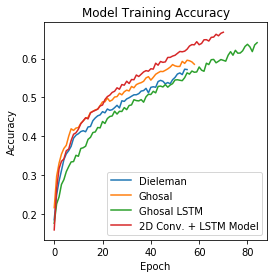

In [87]:
plt.figure(figsize=(4,4))
# summarize history for loss
max_epoch = 125
min_epoch = 0
plt.plot(dieleman_history.history['acc'][min_epoch:max_epoch], label='Dieleman')
plt.plot(ghosal_no_lstm_history.history['acc'][min_epoch:max_epoch], label='Ghosal')
plt.plot(ghosal_lstm_history.history['acc'][min_epoch:max_epoch], label='Ghosal LSTM')
plt.plot(ghosal_mod_history.history['acc'][min_epoch:max_epoch], label='2D Conv. + LSTM Model')

plt.title('Model Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.savefig('modelTrainAcc.png', bbox_inches='tight')
plt.show()

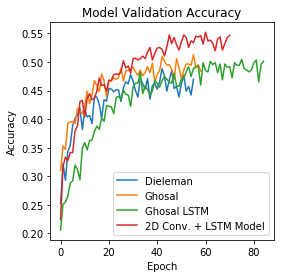

In [88]:
plt.figure(figsize=(4,4))
# summarize history for loss
max_epoch = 125
min_epoch = 0
plt.plot(dieleman_history.history['val_acc'][min_epoch:max_epoch], label='Dieleman')
plt.plot(ghosal_no_lstm_history.history['val_acc'][min_epoch:max_epoch], label='Ghosal')
plt.plot(ghosal_lstm_history.history['val_acc'][min_epoch:max_epoch], label='Ghosal LSTM')
plt.plot(ghosal_mod_history.history['val_acc'][min_epoch:max_epoch], label='2D Conv. + LSTM Model')

plt.title('Model Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.savefig('modelValAcc.png', bbox_inches='tight')
plt.show()

0


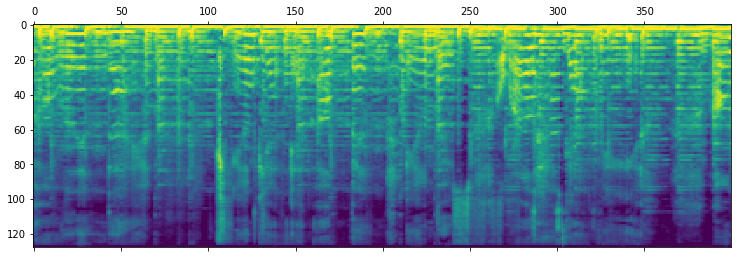

1


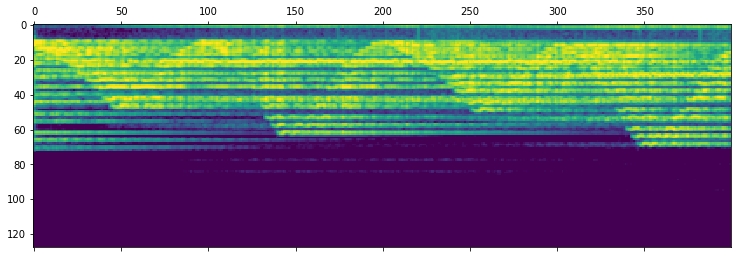

2


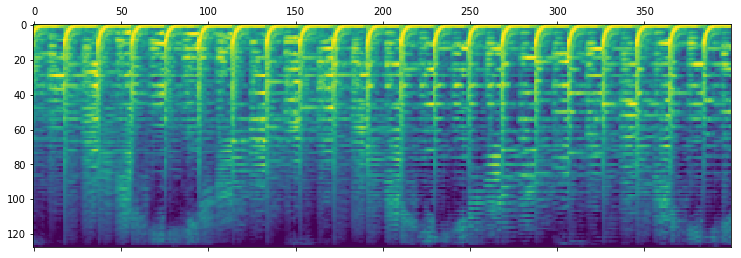

3


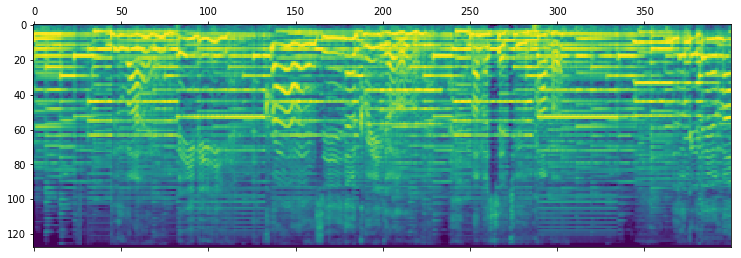

4


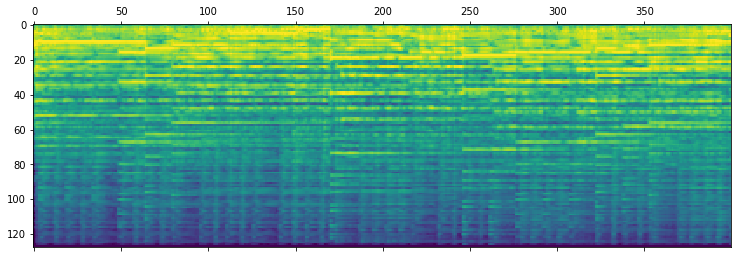

5


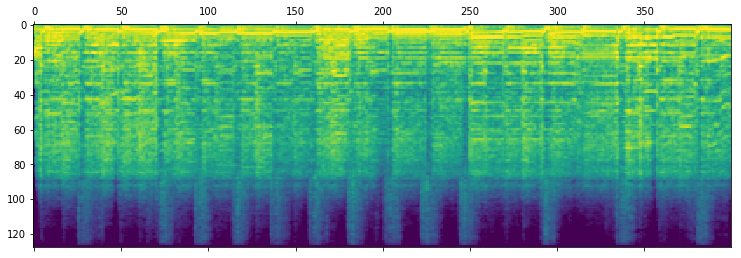

6


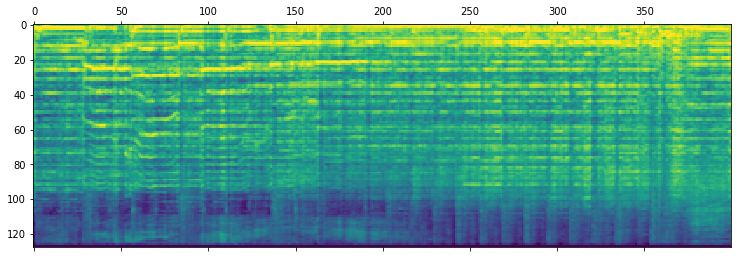

7


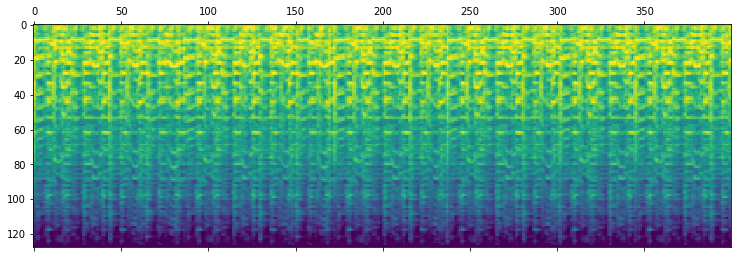

8


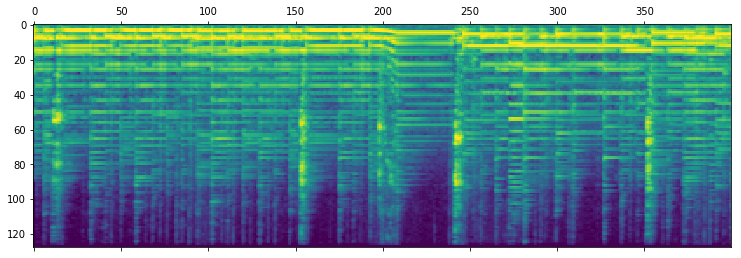

9


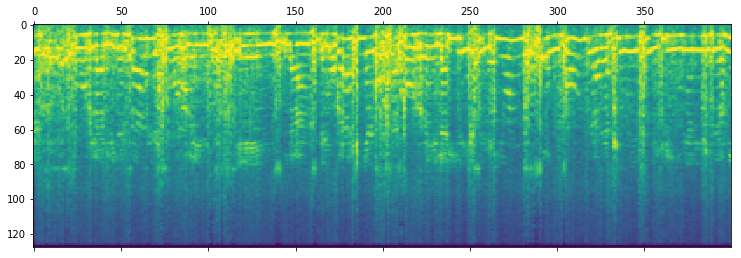

10


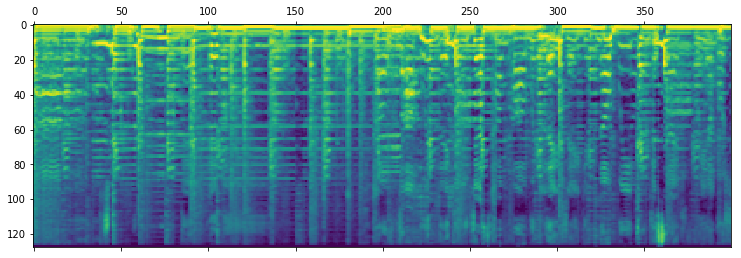

11


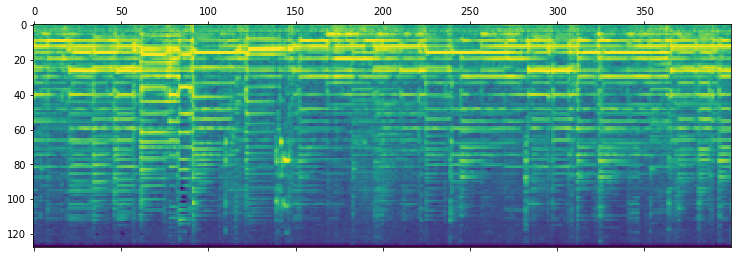

12


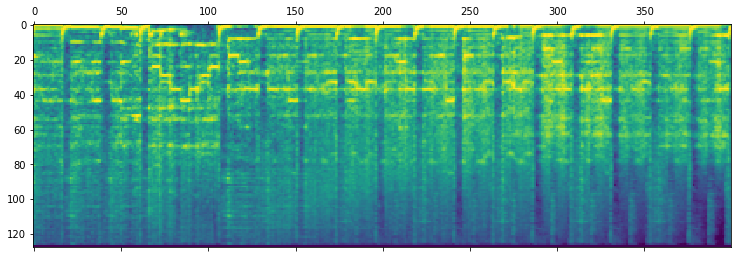

13


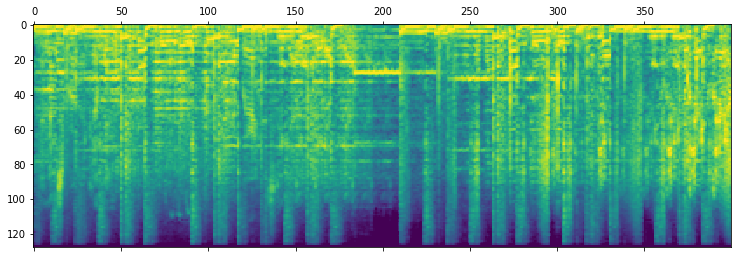

14


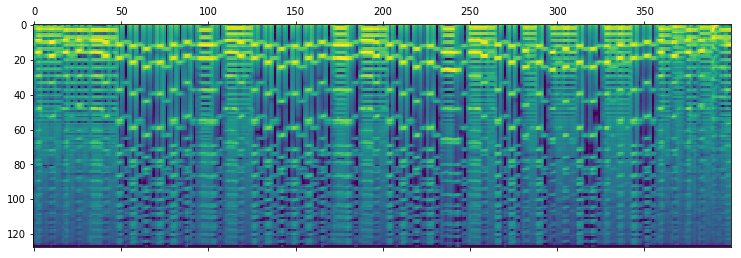

15


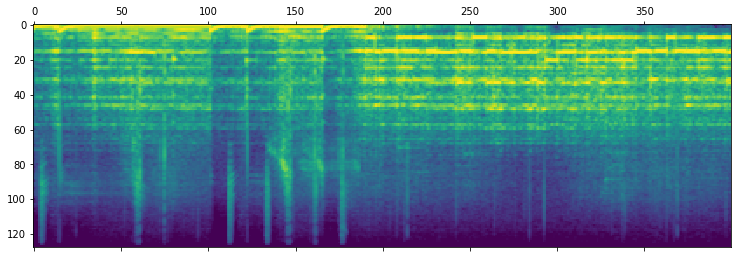

16


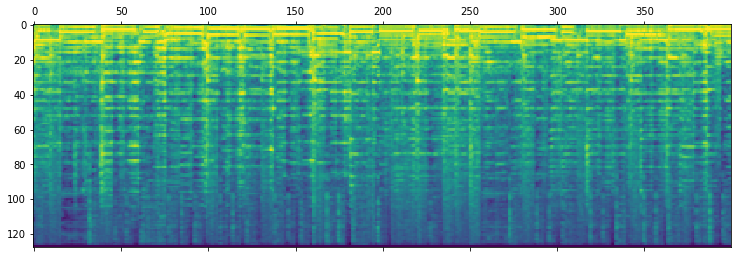

17


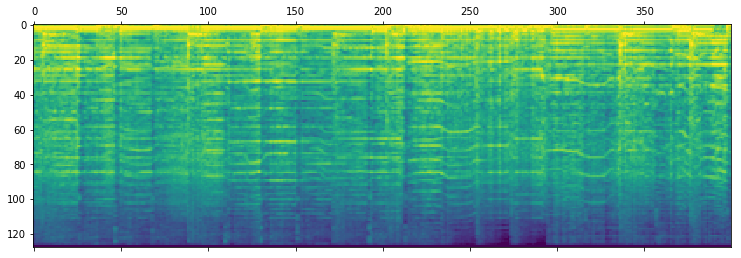

18


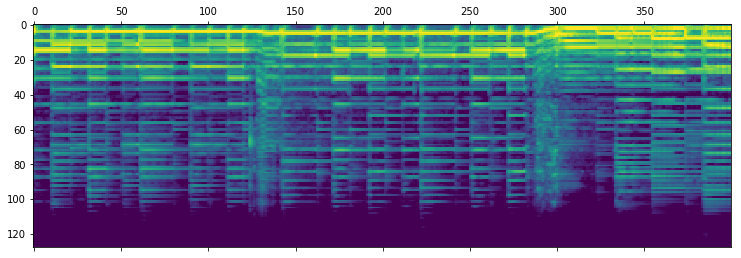

19


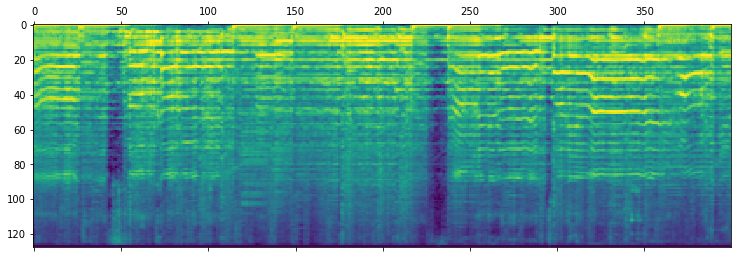

20


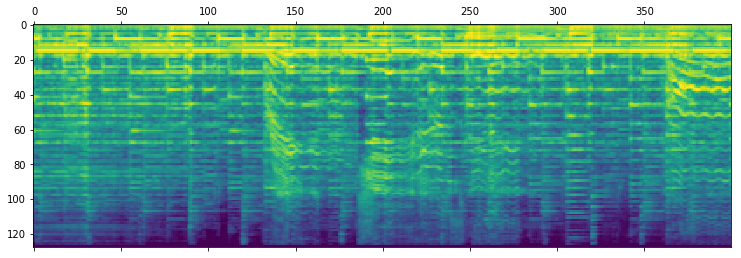

21


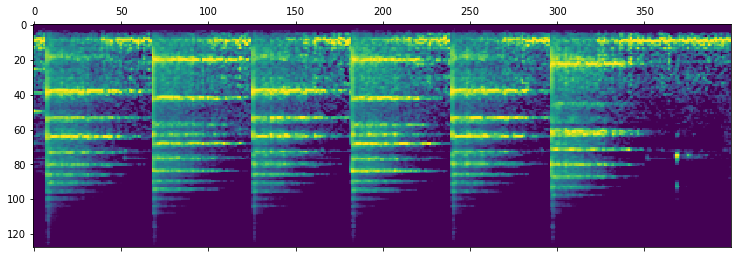

22


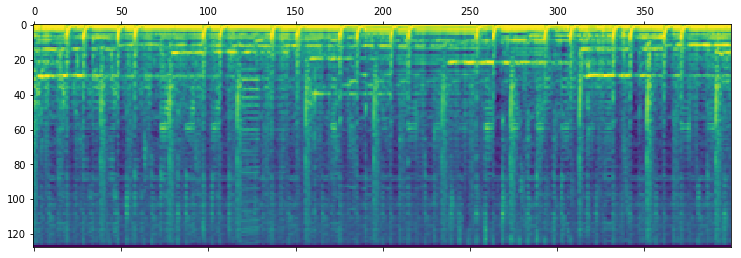

23


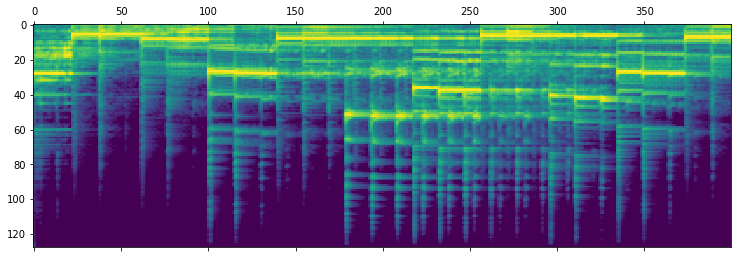

24


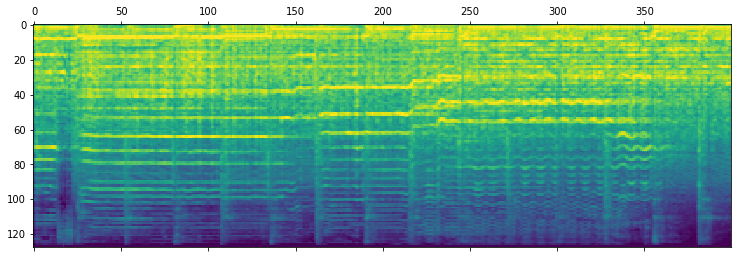

25


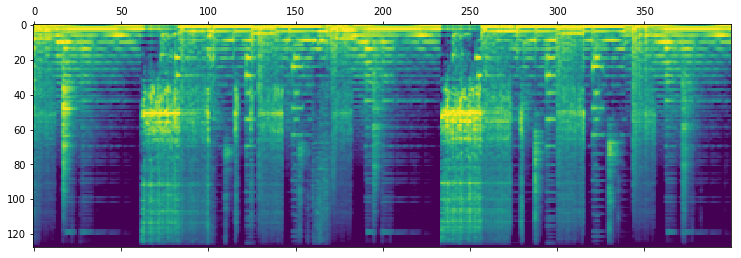

26


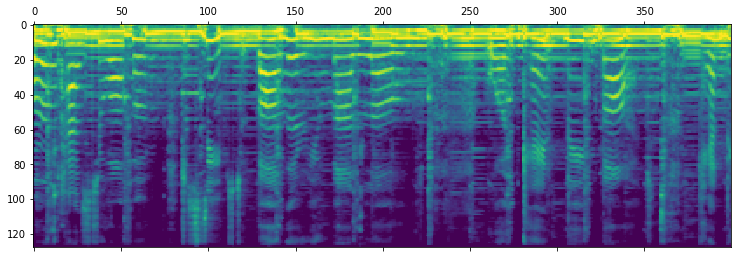

27


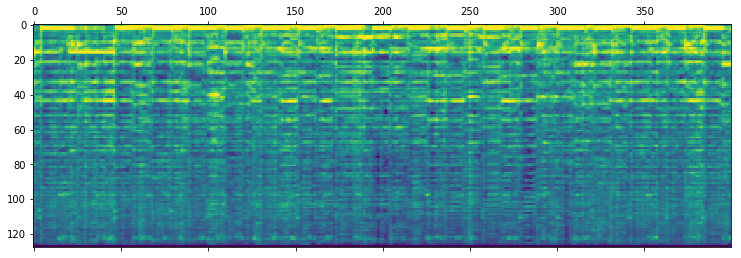

28


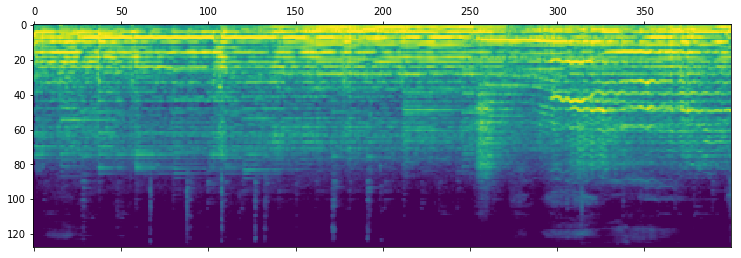

29


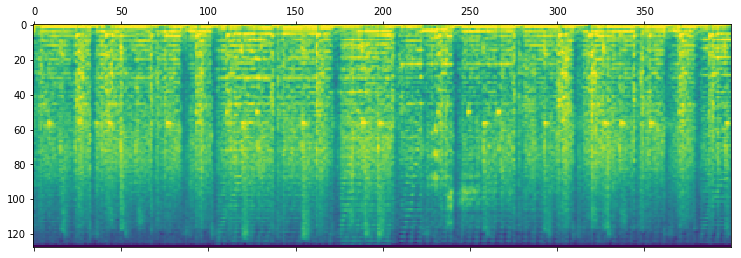

30


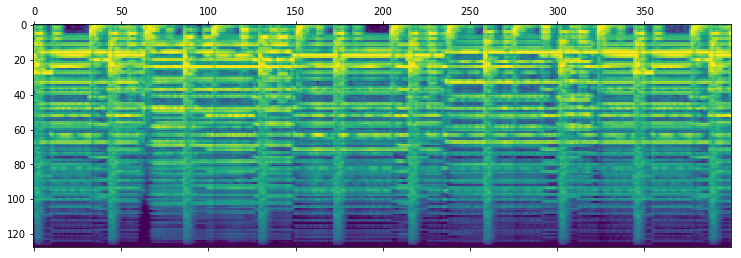

31


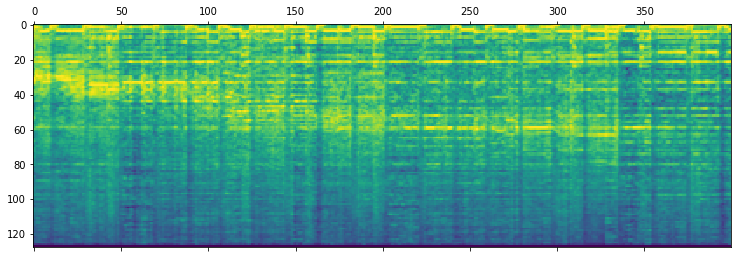

32


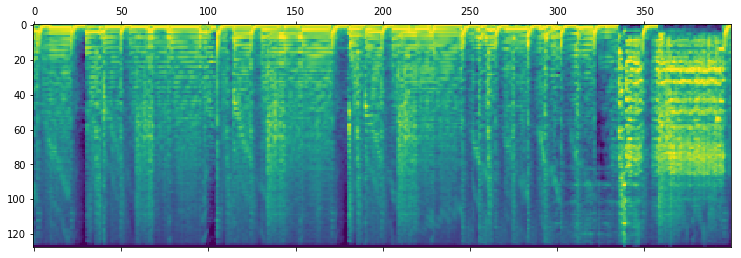

33


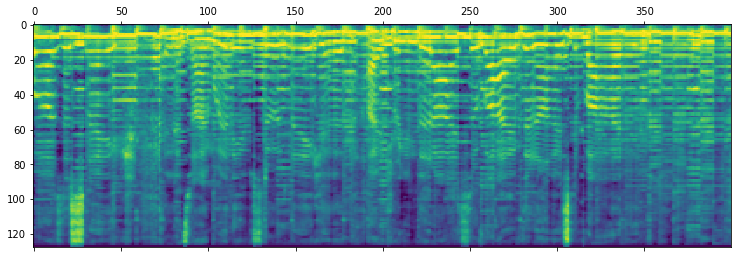

34


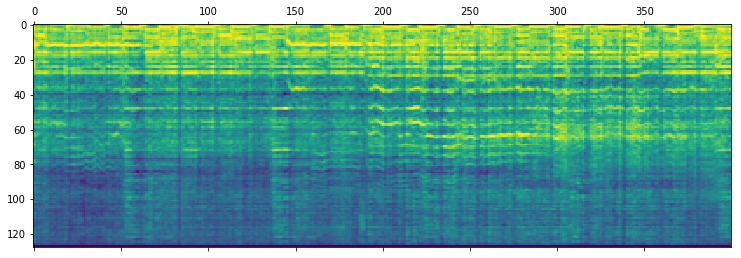

35


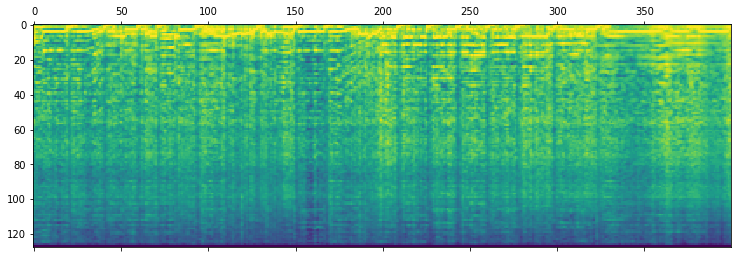

36


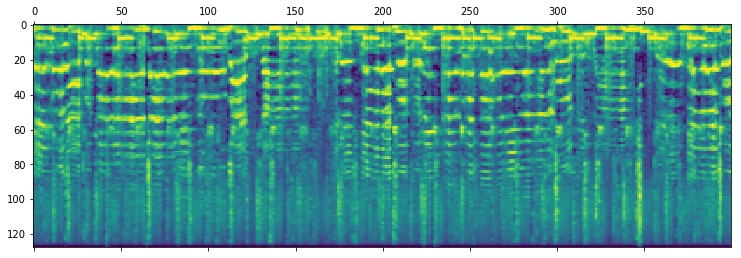

37


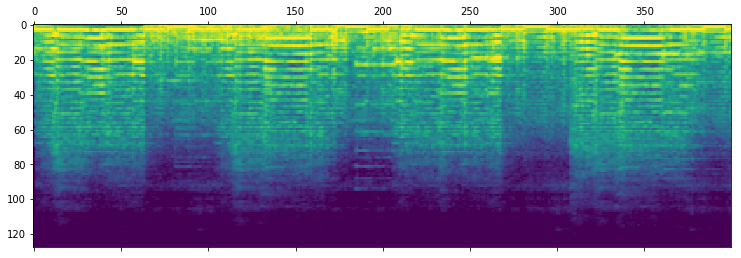

38


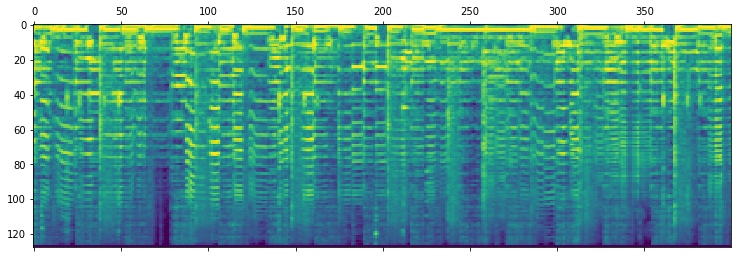

39


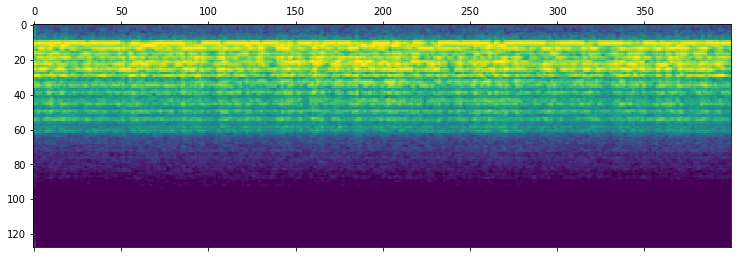

40


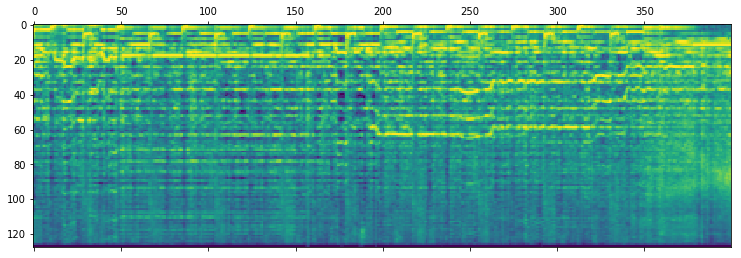

41


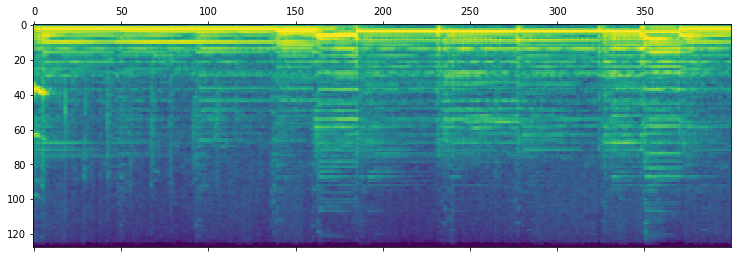

42


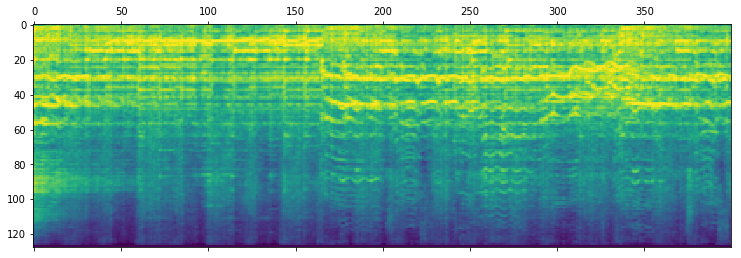

43


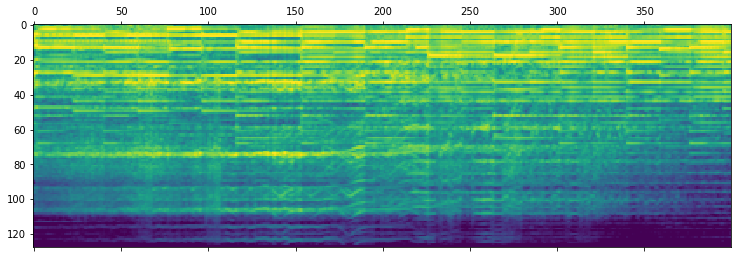

44


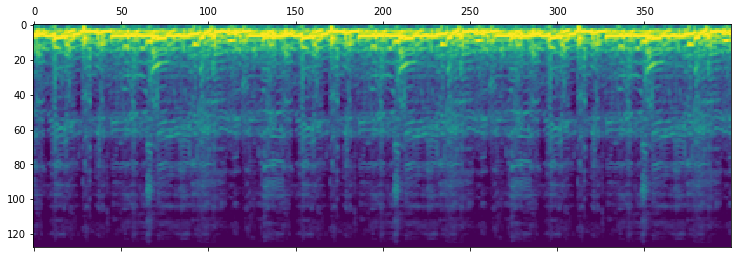

45


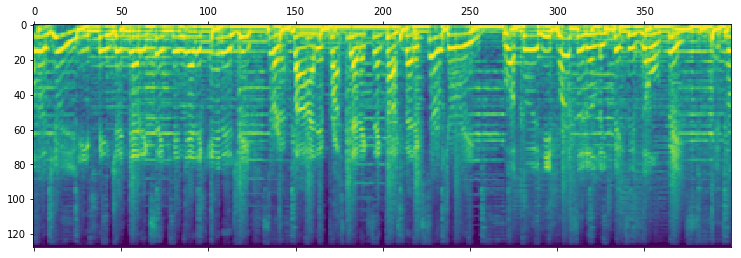

46


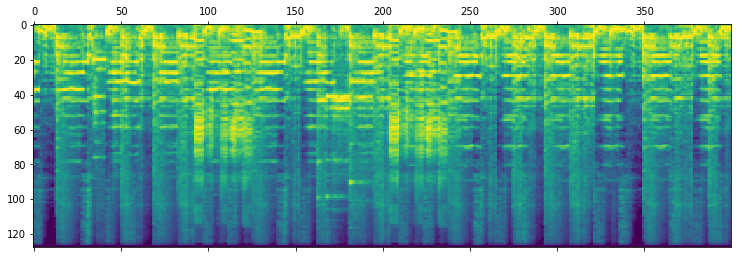

47


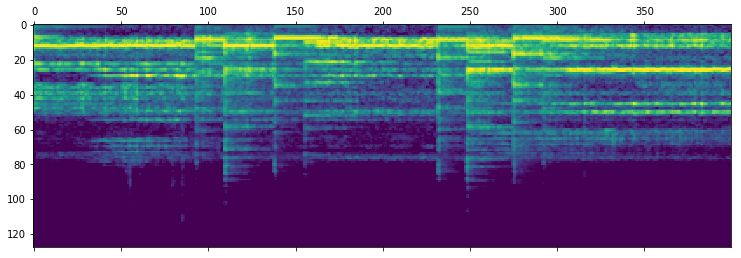

48


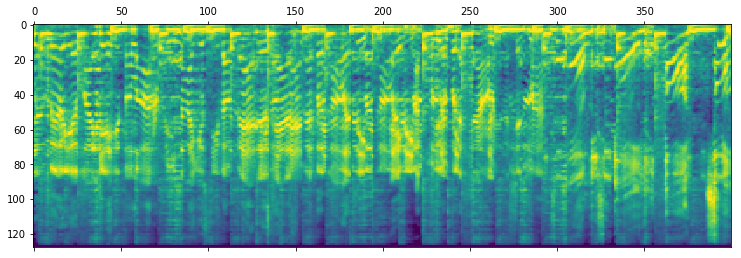

49


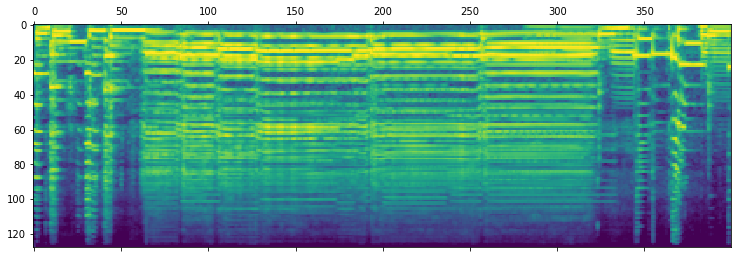

In [7]:
for i in range(50):
    print(i)
    plt.figure(figsize=(20,4))
    plt.matshow(np.transpose(x_train[i,0:400,:]))
    plt.show()

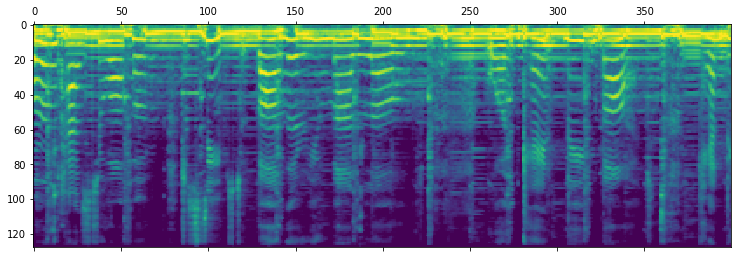

In [9]:
plt.figure(figsize=(20,4))
plt.matshow(np.transpose(x_train[26,0:400,:]))
plt.savefig('SpectrogramSample.png')
plt.show()

# F1 Scores

In [58]:
from keras import backend as K

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def to_one_hot(predictions):
    predictions_one_hot = np.zeros(predictions.shape)
    predictions_one_hot[np.arange(len(y_pred)), np.argmax(y_pred, axis=1)] = 1
    return predictions_one_hot

def pred_to_class(predictions):
    one_hot = to_one_hot(predictions)
    return np.argmax(one_hot, axis=1)


In [61]:
from sklearn.metrics import f1_score

model = load_model('models/dieleman1.h5')
y_pred = model.predict(x_test)
print('dieleman')
print(f1_score(np.argmax(y_test, axis=1), pred_to_class(y_pred), average='weighted'))
print(f1_score(np.argmax(y_test, axis=1), pred_to_class(y_pred), average='macro'))

model = load_model('models/ghosal_no_lstm1.h5')
y_pred = model.predict(x_test)
print('ghosal_no_lstm1')
print(f1_score(np.argmax(y_test, axis=1), pred_to_class(y_pred), average='weighted'))
print(f1_score(np.argmax(y_test, axis=1), pred_to_class(y_pred), average='macro'))

model = load_model('models/ghosal_lstm1.h5')
y_pred = model.predict(x_test)
print('ghosal_lstm1')
print(f1_score(np.argmax(y_test, axis=1), pred_to_class(y_pred), average='weighted'))
print(f1_score(np.argmax(y_test, axis=1), pred_to_class(y_pred), average='macro'))


model = load_model('models/ghosal_lstm_all_hiddens1.h5')
y_pred = model.predict(x_test)
print('ghosal_lstm_all_hiddens1')
print(f1_score(np.argmax(y_test, axis=1), pred_to_class(y_pred), average='weighted'))
print(f1_score(np.argmax(y_test, axis=1), pred_to_class(y_pred), average='macro'))


model = load_model('models/ghosal_mod1.h5')
y_pred = model.predict(x_test)
print('ghosal_mod1')
print(f1_score(np.argmax(y_test, axis=1), pred_to_class(y_pred), average='weighted'))
print(f1_score(np.argmax(y_test, axis=1), pred_to_class(y_pred), average='macro'))


model = load_model('models/ghosal_mod_LSTM1.h5')
y_pred = model.predict(x_test)
print('ghosal_mod_LSTM1')
print(f1_score(np.argmax(y_test, axis=1), pred_to_class(y_pred), average='weighted'))
print(f1_score(np.argmax(y_test, axis=1), pred_to_class(y_pred), average='macro'))



dieleman
0.44506725427387694
0.44544566291509974
ghosal_no_lstm1
0.4728764439421542
0.47060911706792363
ghosal_lstm1
0.4845100733313841
0.4842163842377599
ghosal_lstm_all_hiddens1
0.3000843101669982
0.3046724096435903
ghosal_mod1
0.5326613024678873
0.5299614726186699
ghosal_mod_LSTM1
0.543937870275012
0.5423644908785737


# Confusion Matrices

In [65]:
from sklearn.metrics import confusion_matrix

model = load_model('models/dieleman1.h5')
y_pred = model.predict(x_test)
print('dieleman')
print(confusion_matrix(np.argmax(y_test, axis=1), pred_to_class(y_pred)))

model = load_model('models/ghosal_no_lstm1.h5')
y_pred = model.predict(x_test)
print('ghosal_no_lstm1')
print(confusion_matrix(np.argmax(y_test, axis=1), pred_to_class(y_pred)))

model = load_model('models/ghosal_lstm1.h5')
y_pred = model.predict(x_test)
print('ghosal_lstm1')
print(confusion_matrix(np.argmax(y_test, axis=1), pred_to_class(y_pred)))

model = load_model('models/ghosal_mod_LSTM1.h5')
y_pred = model.predict(x_test)
print('ghosal_mod_LSTM1')
print(confusion_matrix(np.argmax(y_test, axis=1), pred_to_class(y_pred)))


dieleman
[[66 16  0 11 14  2  8  6]
 [17 24  4  3 28  7 11 16]
 [ 3  2 39  0 12 14  9  9]
 [35  1  1 49  0  1 10  5]
 [ 6 11  5  1 60  1  2  1]
 [16  4  8  4  3 47  9 11]
 [19  4 10  6  6  8 14 22]
 [ 4  6  8  1  2  6  6 66]]
ghosal_no_lstm1
[[66  7  1 21 12  3  5  8]
 [11 31  7 11 21  5  7 17]
 [ 3  4 42  2 15  8 10  4]
 [13  3  0 71  2  5  4  4]
 [ 6  8  2  2 58  3  4  4]
 [12  7  7  8  3 46  8 11]
 [16 10  9 12  4 10 11 17]
 [ 3  6  8  4  4  3  5 66]]
ghosal_lstm1
[[53  8  2 16 14 16  7  7]
 [13 33 13  5 22  7  7 10]
 [ 1  0 56  0  6  8  9  8]
 [15  1  2 67  1  6  7  3]
 [ 4 12 12  3 47  2  3  4]
 [ 8  5  8  7  3 58  7  6]
 [14  8 15  6  4 10 18 14]
 [ 4  4 11  1  6  6  3 64]]
ghosal_mod_LSTM1
[[70  5  1 12 15 11  7  2]
 [ 6 53 13  4 16  8  3  7]
 [ 1  5 55  1  9 11  4  2]
 [22  2  0 60  1  9  5  3]
 [ 6  6  4  0 60  2  7  2]
 [12  3  8  6  4 59  5  5]
 [14  7  9  7  4 13 26  9]
 [ 2  9 14  2  6  4  7 55]]


# Classification Report

In [66]:
from sklearn.metrics import classification_report

model = load_model('models/dieleman1.h5')
y_pred = model.predict(x_test)
print('dieleman')
print(classification_report(np.argmax(y_test, axis=1), pred_to_class(y_pred)))


model = load_model('models/ghosal_no_lstm1.h5')
y_pred = model.predict(x_test)
print('ghosal_no_lstm1')
print(classification_report(np.argmax(y_test, axis=1), pred_to_class(y_pred)))

model = load_model('models/ghosal_lstm1.h5')
y_pred = model.predict(x_test)
print('ghosal_lstm1')
print(classification_report(np.argmax(y_test, axis=1), pred_to_class(y_pred)))

model = load_model('models/ghosal_mod_LSTM1.h5')
y_pred = model.predict(x_test)
print('ghosal_mod_LSTM1')
print(classification_report(np.argmax(y_test, axis=1), pred_to_class(y_pred)))


dieleman
              precision    recall  f1-score   support

           0       0.40      0.54      0.46       123
           1       0.35      0.22      0.27       110
           2       0.52      0.44      0.48        88
           3       0.65      0.48      0.55       102
           4       0.48      0.69      0.57        87
           5       0.55      0.46      0.50       102
           6       0.20      0.16      0.18        89
           7       0.49      0.67      0.56        99

   micro avg       0.46      0.46      0.46       800
   macro avg       0.45      0.46      0.45       800
weighted avg       0.45      0.46      0.45       800

ghosal_no_lstm1
              precision    recall  f1-score   support

           0       0.51      0.54      0.52       123
           1       0.41      0.28      0.33       110
           2       0.55      0.48      0.51        88
           3       0.54      0.70      0.61       102
           4       0.49      0.67      0.56        87